**Tarefas**

https://investexcel.net/all-yahoo-finance-stock-tickers/

**-base básica com x e y (Alex)**

*-lógica do python para calcular o ganho com base nos cruzamentos (Robert) - OK*

-acrescentar as médias (simples e exponenciais)

-acrescentar variáveis temporais

-acrescentar web scrapping para buscar notícias

-acrescentar NLP

-acrescentar sazonalidade

-ranking de ações




---



Resultado final:
Criar top n de ações com maior potencial de crescimento.


Criar uma decisão para ação (comprar ou vender) com nota.


Colocar um job.


Colocar notificações.


Automatizar a compra.


In [ ]:
#!pip install yahooquery

In [ ]:
from yahooquery import Ticker

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
petr = Ticker('PETR4.SA').history(period='max')

In [ ]:
petr

open      close  ...  dividends  splits
symbol   date                              ...                   
PETR4.SA 2000-01-03   5.875000   5.875000  ...        0.0     0.0
         2000-01-04   5.550000   5.550000  ...        0.0     0.0
         2000-01-05   5.494000   5.494000  ...        0.0     0.0
         2000-01-06   5.475000   5.475000  ...        0.0     0.0
         2000-01-07   5.500000   5.500000  ...        0.0     0.0
...                        ...        ...  ...        ...     ...
         2021-01-07  30.340000  31.000000  ...        0.0     0.0
         2021-01-08  31.459999  31.100000  ...        0.0     0.0
         2021-01-11  30.610001  30.860001  ...        0.0     0.0
         2021-01-12  31.120001  30.629999  ...        0.0     0.0
         2021-01-13   0.000000  29.150000  ...        0.0     0.0

[5173 rows x 8 columns]

In [ ]:
plt.rcParams["figure.figsize"] = [16,9]

In [ ]:
petr = petr.droplevel(0, 'index')

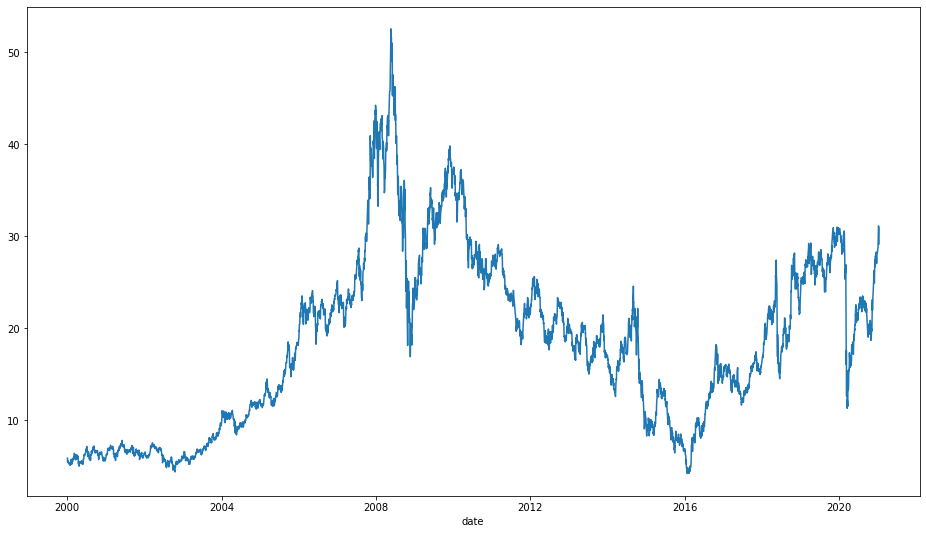

In [ ]:
petr.close.plot();

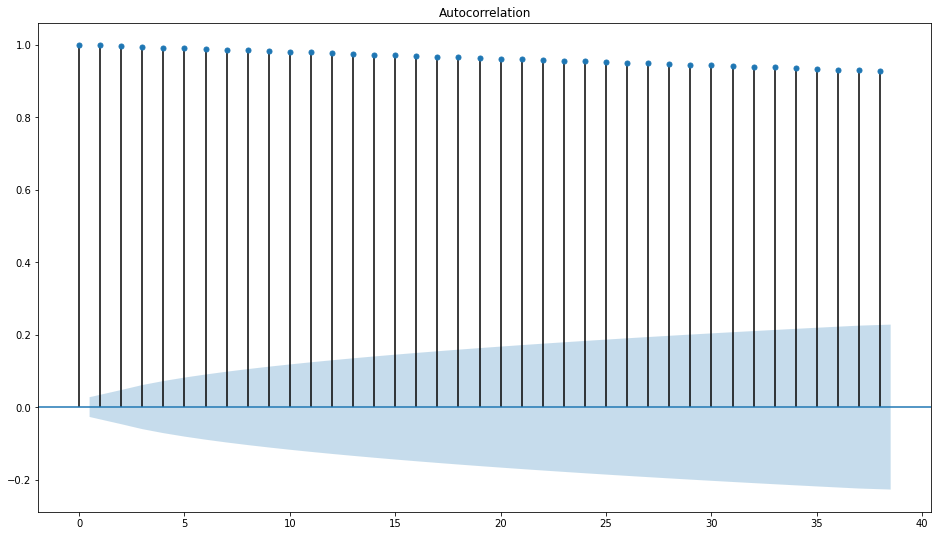

In [ ]:
plot_acf(petr.close);

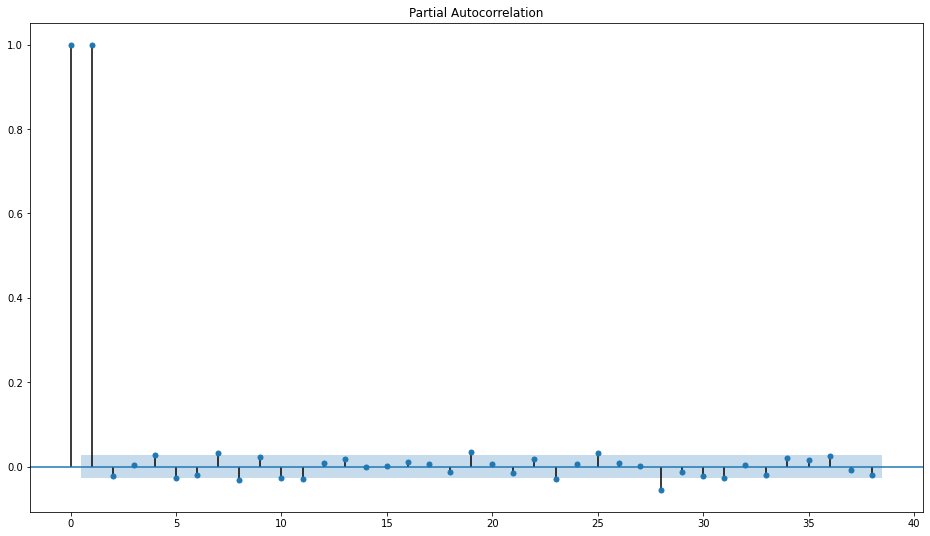

In [ ]:
plot_pacf(petr.close);

In [ ]:
petr = petr.asfreq(freq='D')

In [ ]:
petr.dropna(inplace=True)

In [ ]:
dec = seasonal_decompose(petr.close, freq=30)

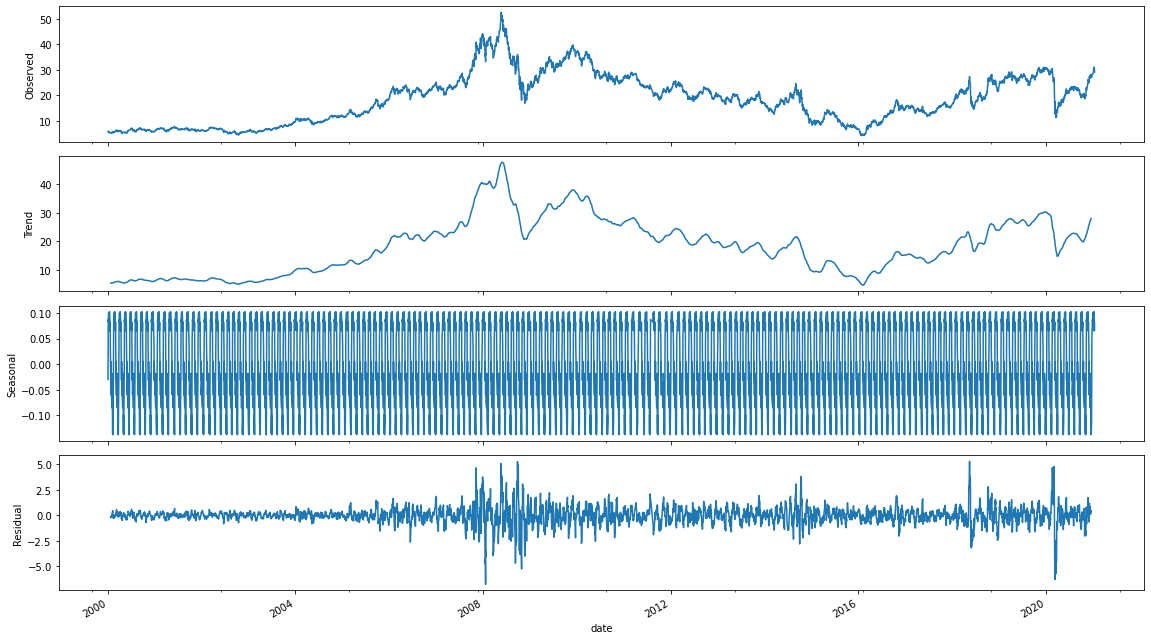

In [ ]:
dec.plot();

In [ ]:

petr['media7'] = petr.close.rolling(7).mean()
petr['media15'] = petr.close.rolling(15).mean()
petr['media30'] = petr.close.rolling(30).mean()
petr['media60'] = petr.close.rolling(60).mean()
petr['media90'] = petr.close.rolling(90).mean()
petr['media120'] = petr.close.rolling(120).mean()


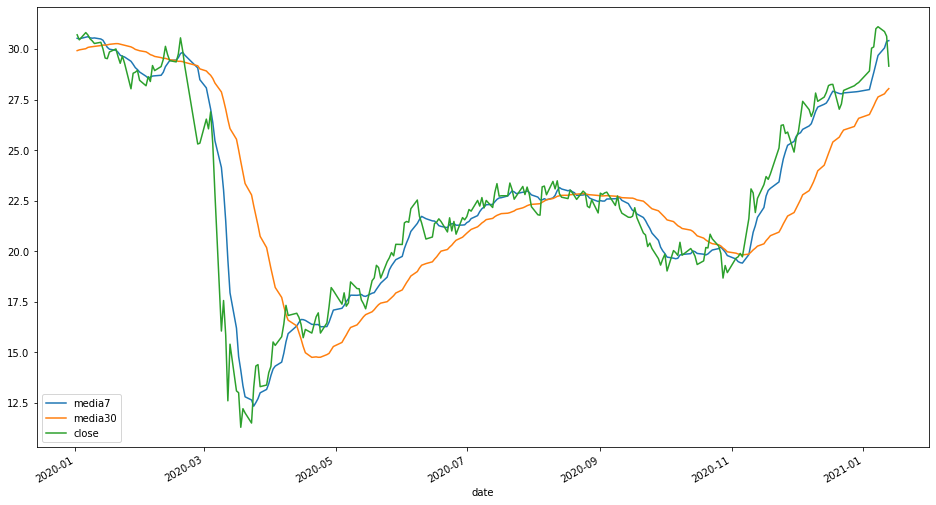

In [ ]:
petr.loc['2020-01':][['media7','media30','close']].plot()

In [ ]:
petr['media7t-1'] = petr['media7'].shift()
petr['media30t-1'] = petr['media30'].shift()
petr.dropna(inplace=True)

In [ ]:
petr['operacao'] = 'N/D'
petr.loc[(petr['media30t-1'] > petr['media7t-1']) & (petr['media30'] <=  petr['media7']),'operacao'] = 'compra'
petr.loc[(petr['media30t-1'] < petr['media7t-1']) & (petr['media30'] >=  petr['media7']),'operacao'] = 'venda'

In [ ]:
def calcula_lucro_acao(df, campo_quantidade, campo_label):
  ndf = df[df[campo_label] != 'N/D'].copy()
  ndf['valor_anterior'] = ndf[campo_quantidade].shift()

  if ndf.iloc[0][campo_label] == 'venda':
    ndf = ndf.iloc[1:]

  ndf = ndf[ndf[campo_label] == 'venda']
  ndf['ganho_perc'] = (ndf[campo_quantidade] - ndf['valor_anterior']) / ndf['valor_anterior']

  ndf = ndf[['valor_anterior',campo_quantidade,'ganho_perc']]
  ndf.columns = ['compra','venda','retorno_perc']
  return ndf

In [ ]:
calcula_lucro_acao(petr,'close','operacao')

,compra,venda,retorno_perc
date,,,
2000-09-21,6.625000,6.512500,-0.016981
2000-11-10,6.437500,6.268750,-0.026214
2000-11-29,6.350000,6.047500,-0.047638
2001-03-15,6.250000,6.293750,0.007000
2001-04-20,6.250000,6.037500,-0.034000
...,...,...,...
2019-12-02,27.660000,29.070000,0.050976
2020-01-16,30.440001,29.520000,-0.030223
2020-02-27,29.360001,25.299999,-0.138283
